In [4]:
import sys
import os
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import fiona

import pandas as pd

os.environ["USE_PYGEOS"] = "0"
import geopandas as gpd

# sys.path.insert(0, "../src/helper/")
sys.path.insert(0, "../src/")

from landprice_merger import (
    zensus_landprice_merger,
    landprice_neighborhood_merger,
    combine_landprice_with_geodata,
)
from csv_merger import combine_csvs
from principal_component_analysis import combine_PCA_datasets


pd.options.mode.chained_assignment = None


In [4]:
cities = [
    "Berlin",
    "Bremen",
    "Dresden",
    "Frankfurt_am_Main",
    "Köln".encode("utf-8").decode("utf-8"),
]

main_path = os.path.join(os.getcwd(), "..")

path_zensus = os.path.join(main_path, "res", "data", "DLR", "2 Zensus")
path_land = os.path.join(main_path, "res", "data", "DLR", "1 Land Prices")
path_neigh = os.path.join(main_path, "res", "data", "DLR", "3 Neighborhoods")


In [5]:
df_zensus = combine_csvs(str_path=path_zensus)

gdf_zensus = combine_PCA_datasets(
    df_zensus=df_zensus, str_city=cities[4], str_path=path_zensus
)

df_land_prices = combine_csvs(str_path=path_land)

gdf_landprices = combine_landprice_with_geodata(
    df_landprice=df_land_prices, str_city=cities[4], str_path=path_land
)

gdf_landprices_names = landprice_neighborhood_merger(
    gdf_landprice=gdf_landprices, str_city=cities[4], str_path_neigh=path_neigh
)


ValueError: Found array with 0 sample(s) (shape=(0, 180)) while a minimum of 1 is required by the scale function.

In [1]:
BORIS_path = "../res/data/BORIS/BRW_2011_Polygon.shp"


In [5]:
shape = fiona.open(BORIS_path)
print(shape.schema)


{'properties': {'ACZA': 'str:20', 'AUFW': 'str:2', 'BASBE': 'str:20', 'BASMA': 'str:6', 'BAUW': 'str:2', 'BEDW': 'str:8', 'BEIT': 'str:1', 'BEM': 'str:254', 'BEZUG': 'str:12', 'BMZ': 'str:4', 'BOD': 'str:6', 'BRKE': 'str:1', 'BRW': 'str:8', 'BRWZNR': 'str:8', 'ENTW': 'str:2', 'ERGNUTA': 'str:30', 'ERVE': 'str:1', 'FARBE': 'str:1', 'FLAE': 'str:12', 'FREI': 'str:254', 'GABE': 'str:140', 'GASL': 'str:5', 'GBREI': 'str:4', 'GEMA': 'str:60', 'GENA': 'str:30', 'GENU': 'str:4', 'GESL': 'str:8', 'GEZ': 'str:9', 'GFZ': 'str:4', 'GFZ_TIEFE': 'str:3', 'GFZBV': 'str:2', 'GRZ': 'str:3', 'GRZA': 'str:7', 'GTIE': 'str:4', 'HBRW': 'str:8', 'HTAG': 'str:10', 'LUMNUM': 'str:101', 'LURT': 'str:3', 'NUTA': 'str:8', 'ORTST': 'str:60', 'PLZ': 'str:5', 'STAG': 'str:10', 'UDOK': 'str:1', 'UDOK_URL': 'str:100', 'VERF': 'str:2', 'VERG': 'str:4', 'VERGNR': 'str:8', 'WEER': 'str:4', 'WNUM': 'str:7', 'XVERG': 'str:7', 'XWERT': 'str:7', 'YVERG': 'str:8', 'YWERT': 'str:8', 'ZOG': 'str:5'}, 'geometry': 'Polygon'}


In [6]:
gdf = gpd.read_file(BORIS_path)


KeyboardInterrupt: 

In [ ]:
gdf_cologne = gdf[(gdf.BRW.notnull()) & (gdf.GENA == "Köln")]


In [ ]:
gdf_cologne = gdf_cologne.dropna(axis=1)


In [ ]:
gdf_cologne["BRW"] = pd.to_numeric(gdf_cologne["BRW"])
gdf_cologne["BRWZNR"] = pd.to_numeric(gdf_cologne["BRWZNR"])
gdf_cologne["FARBE"] = pd.to_numeric(gdf_cologne["FARBE"])


In [ ]:
gdf_cologne.shape


(565, 20)

In [ ]:
gdf_cologne.head()


,BEIT,BEZUG,BRKE,BRW,BRWZNR,ENTW,FARBE,GABE,GASL,GENA,GESL,NUTA,PLZ,STAG,UDOK,UDOK_URL,WNUM,XWERT,YWERT,geometry
18934,1,ETRS89_UTM32,1,900,101001,B,2,Der Gutachterausschuss für Grundstückswerte in...,11400,Köln,05315000,MK,50667,2011-01-01,2,https://www.boris.nrw.de/borisfachdaten/lgd/br...,101001,5644692,355529,"POLYGON ((355574.743 5644694.479, 355574.358 5..."
18935,1,ETRS89_UTM32,1,870,101003,B,2,Der Gutachterausschuss für Grundstückswerte in...,11400,Köln,05315000,MI,50667,2011-01-01,2,https://www.boris.nrw.de/borisfachdaten/lgd/br...,101003,5644457,356398,"POLYGON ((356416.784 5644585.848, 356419.235 5..."
18936,1,ETRS89_UTM32,1,1290,101011,B,2,Der Gutachterausschuss für Grundstückswerte in...,11400,Köln,05315000,MI,50678,2011-01-01,2,https://www.boris.nrw.de/borisfachdaten/lgd/br...,101011,5643229,356560,"POLYGON ((356559.162 5643047.665, 356546.089 5..."
18937,1,ETRS89_UTM32,1,880,102001,B,2,Der Gutachterausschuss für Grundstückswerte in...,11400,Köln,05315000,WB,50674,2011-01-01,2,https://www.boris.nrw.de/borisfachdaten/lgd/br...,102001,5644166,354857,"POLYGON ((354855.110 5644764.168, 354862.254 5..."
18938,1,ETRS89_UTM32,1,1100,104001,B,2,Der Gutachterausschuss für Grundstückswerte in...,11400,Köln,05315000,MK,50668,2011-01-01,2,https://www.boris.nrw.de/borisfachdaten/lgd/br...,104001,5646569,357095,"POLYGON ((356746.067 5646487.332, 356762.206 5..."


In [ ]:
gdf.columns


Index(['ACZA', 'AUFW', 'BASBE', 'BASMA', 'BAUW', 'BEDW', 'BEIT', 'BEM',
       'BEZUG', 'BMZ', 'BOD', 'BRKE', 'BRW', 'BRWZNR', 'ENTW', 'ERGNUTA',
       'ERVE', 'FARBE', 'FLAE', 'FREI', 'GABE', 'GASL', 'GBREI', 'GEMA',
       'GENA', 'GENU', 'GESL', 'GEZ', 'GFZ', 'GFZ_TIEFE', 'GFZBV', 'GRZ',
       'GRZA', 'GTIE', 'HBRW', 'HTAG', 'LUMNUM', 'LURT', 'NUTA', 'ORTST',
       'PLZ', 'STAG', 'UDOK', 'UDOK_URL', 'VERF', 'VERG', 'VERGNR', 'WEER',
       'WNUM', 'XVERG', 'XWERT', 'YVERG', 'YWERT', 'ZOG', 'geometry'],
      dtype='object')

In [ ]:
gdf_cologne.BRW.describe()


count      565.000000
mean       679.610619
std       1813.045865
min          0.000000
25%        290.000000
50%        370.000000
75%        580.000000
max      27000.000000
Name: BRW, dtype: float64

In [ ]:
gdf_cologne.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 565 entries, 18934 to 19502
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   BEIT      565 non-null    object  
 1   BEZUG     565 non-null    object  
 2   BRKE      565 non-null    object  
 3   BRW       565 non-null    int64   
 4   BRWZNR    565 non-null    int64   
 5   ENTW      565 non-null    object  
 6   FARBE     565 non-null    int64   
 7   GABE      565 non-null    object  
 8   GASL      565 non-null    object  
 9   GENA      565 non-null    object  
 10  GESL      565 non-null    object  
 11  NUTA      565 non-null    object  
 12  PLZ       565 non-null    object  
 13  STAG      565 non-null    object  
 14  UDOK      565 non-null    object  
 15  UDOK_URL  565 non-null    object  
 16  WNUM      565 non-null    object  
 17  XWERT     565 non-null    object  
 18  YWERT     565 non-null    object  
 19  geometry  565 non-null    geometry
dtypes

In [ ]:
gdf_cologne.ENTW.unique()


array(['B', 'SF'], dtype=object)

In [ ]:
gdf_cologne.NUTA.unique()


array(['MK', 'MI', 'WB', 'WR', 'WA', 'GE', 'SO', 'GI', 'MD', 'SN'],
      dtype=object)

In [ ]:
gdf_cologne.FARBE.unique()


array([2, 1, 3, 7])

In [ ]:
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 300


<Axes: >

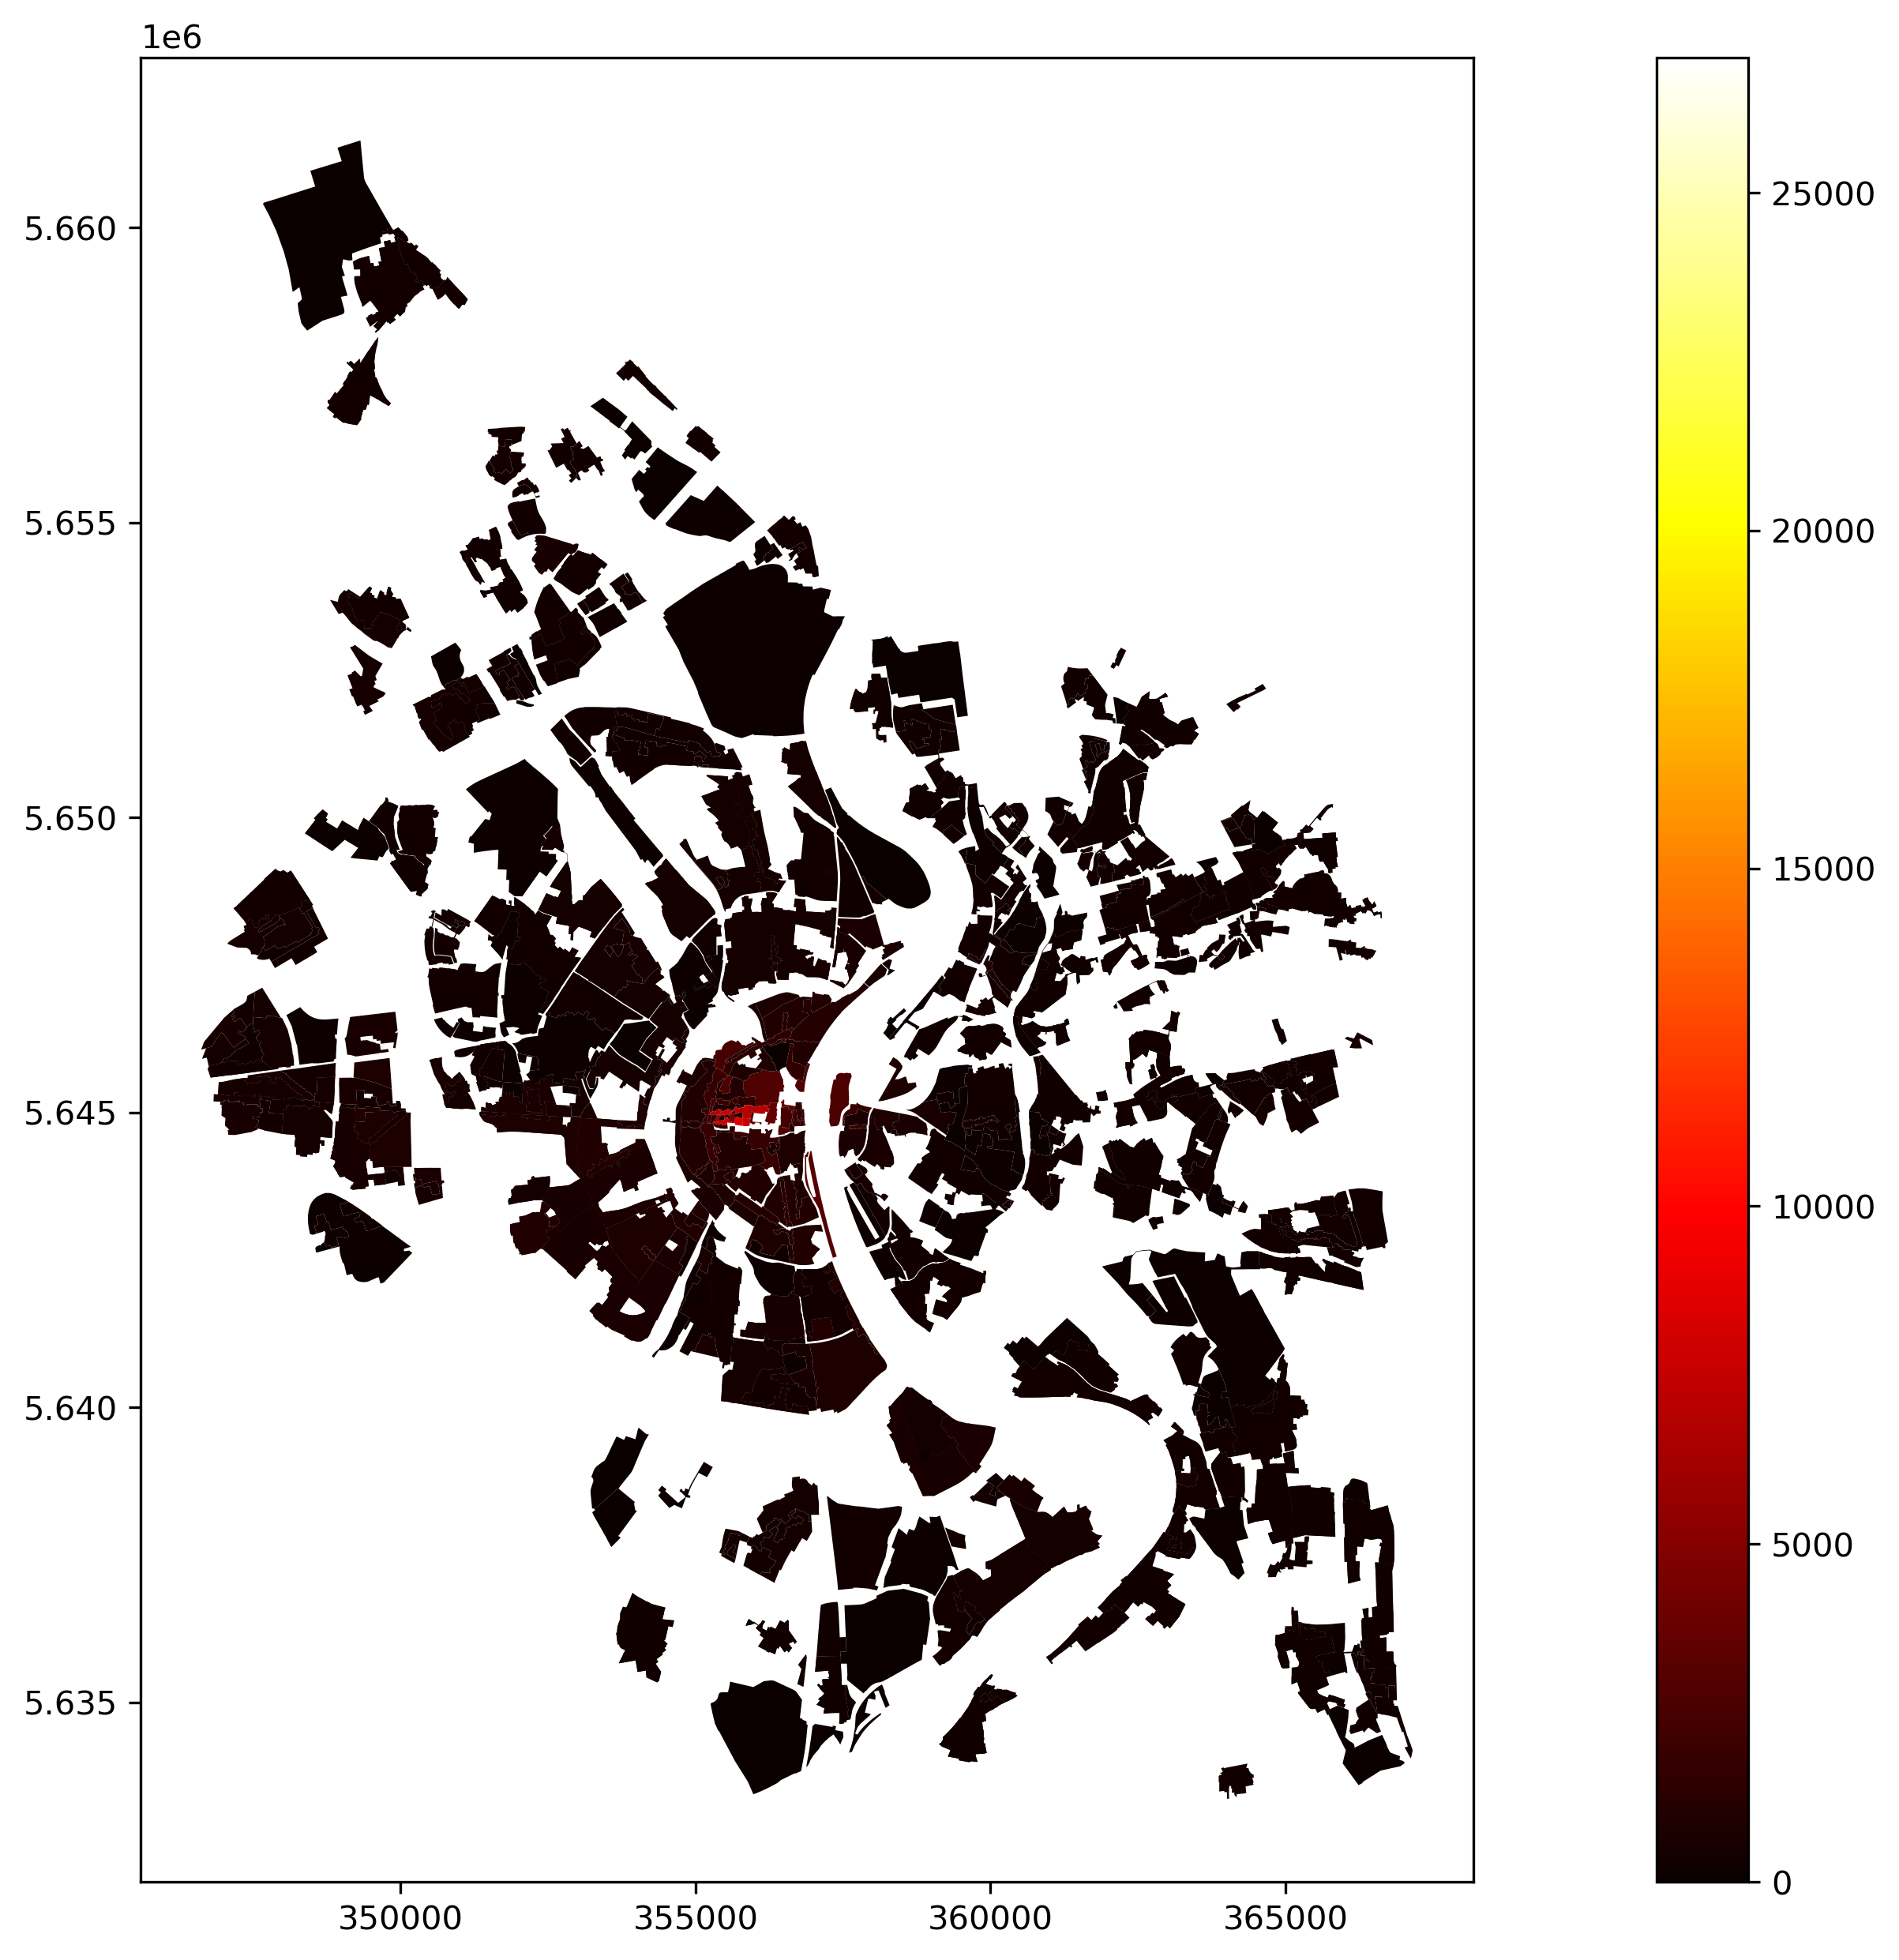

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
gdf_cologne.plot(column="BRW", cmap="hot", legend=True, ax=ax)


In [ ]:
gdf_cologne_small = gdf_cologne[["BRW", "BRWZNR", "NUTA", "FARBE"]]


In [ ]:
gdf_cologne_small.columns = [
    "Land_Value",
    "Neigborhood_FID",
    "Area_Types",
    "Area_Types2",
]


In [ ]:
gdf_cologne_small.head()


,Land_Value,Neigborhood_FID,Area_Types,Area_Types2
18934,900,101001,MK,2
18935,870,101003,MI,2
18936,1290,101011,MI,2
18937,880,102001,WB,2
18938,1100,104001,MK,2


In [ ]:
gdf_cologne_small.Area_Types.describe()


count     565
unique     10
top        WA
freq      314
Name: Area_Types, dtype: object

In [ ]:
gdf_cologne_small.Land_Value.describe()


count      565.000000
mean       679.610619
std       1813.045865
min          0.000000
25%        290.000000
50%        370.000000
75%        580.000000
max      27000.000000
Name: Land_Value, dtype: float64

In [ ]:
gdf_cologne_small.Area_Types2.describe()


count    565.000000
mean       1.787611
std        0.715226
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        7.000000
Name: Area_Types2, dtype: float64